# Exploring the COMPAS-2 Chemical Space

This notebook delves into the chemical space of COMPAS-2 dataset. Different representations are explored and focus on the influence of heterocycles on the electronic properties of molecules is analyzed.  The visualization of these influences in HOMO-LUMO space
scatter plots and categorizations based on ring counts.

In [1]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from colors import cmap, heterocycles_colors, atoms_colors

import pandas as pd
import numpy as np

from pathlib import Path

# autoreload imports
%load_ext autoreload
%autoreload 2

In [2]:
# load the data
df = pd.read_parquet(".temp/data/compas-2x.parquet")

# define utility functions
def get_query_bblocks(bblock: str) -> str:
    """Returns a query string for to returns molecules which only contain benzene and the given bblock"""
    query = "benzene != 0 "
    for ring in heterocycles_colors.keys():
        if ring == "benzene": continue
        if ring == bblock: 
            query += f"& `{ring}` != 0 "
            continue
        query += f"& `{ring}` == 0 "
    return query

def get_query_atoms(atom: str) -> str:
    """Returns a query string for to returns molecules which only contain benzene and the given atom"""
    query = ""
    for masked_atom in atoms_colors.keys():
        if masked_atom == 'c': continue
        if masked_atom == atom: query += f"cyclobutadiene == 0 &"; continue
        query += f"`{masked_atom}` == 0 & "
    query += f"`{atom}` != 0 "
    return query

# Visualization of the coordinates of single-ring hPAHs in the chemical space 

## HOMO-LUMO Scatter Plots for Atoms/Heterocycle-Specific Electronic Structures

A grid of scatter plots illustrates the relationship between the HOMO and LUMO energies. Each subplot corresponds to a specific heterocycle type, marked by distinct colors. Scatter points represent molecules, with colors denoting different heterocycle types. The plots are tailored to showcase location of each mono heterocyclic molecule in the homo-lumo chemical spaces.

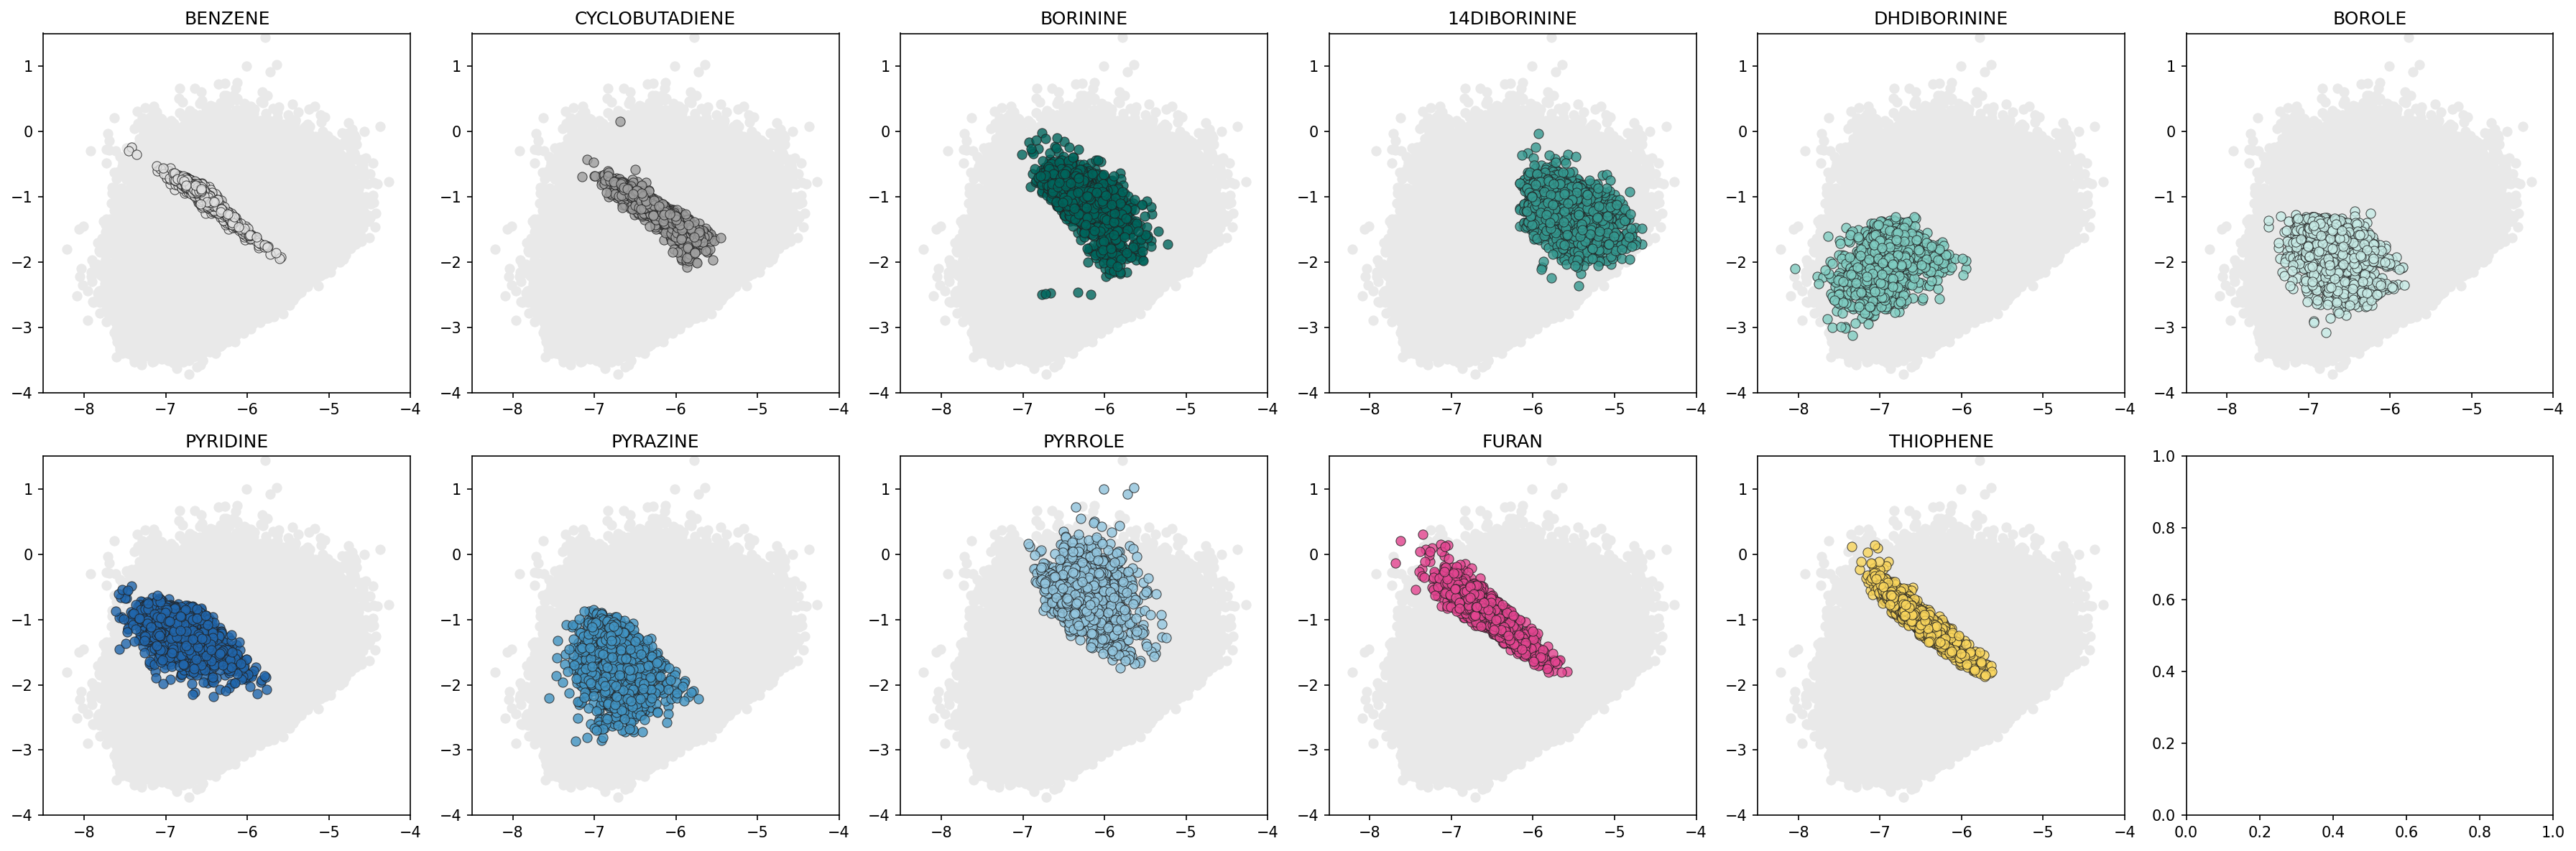

In [3]:
# make a grid plot for each properties n_cols = 6, infer n_rows
n_cols = 6
n_rows = int(np.ceil(len(heterocycles_colors) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows), dpi=150,)
axes = axes.flatten()

for i, (ring, color) in enumerate(heterocycles_colors.items()):
    sns.scatterplot(data=df,
                    x='homo_corr',y='lumo_corr',
                    s=40,
                    color="#E9E9E9",
                    edgecolor=None,
                    ax=axes[i])
    sns.scatterplot(data=df.query(get_query_bblocks(ring)),
                    x='homo_corr',y='lumo_corr',s=40,color=color,
                    edgecolor='#212121',
                    alpha=0.8,
                    ax=axes[i] )
    # remove axis 
    axes[i].set_xlim([-8.5, -4])
    axes[i].set_ylim([-4, 1.5])
    # show only three tickts
    # axes[i].set_xticks([-8, -6, -4]) 
    # axes[i].set_yticks([-4, -2, 0])
    #set title 
    axes[i].set_title(ring.upper())
    # show interger ticks
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))    
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))    
    # # set axis off
    # axes[i].set_axis_off()
    # hide labels
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.tight_layout()

cyclobutadiene == 0 &`n` == 0 & `o` == 0 & `s` == 0 & `b` != 0 
`b` == 0 & cyclobutadiene == 0 &`o` == 0 & `s` == 0 & `n` != 0 
`b` == 0 & `n` == 0 & cyclobutadiene == 0 &`s` == 0 & `o` != 0 
`b` == 0 & `n` == 0 & `o` == 0 & cyclobutadiene == 0 &`s` != 0 


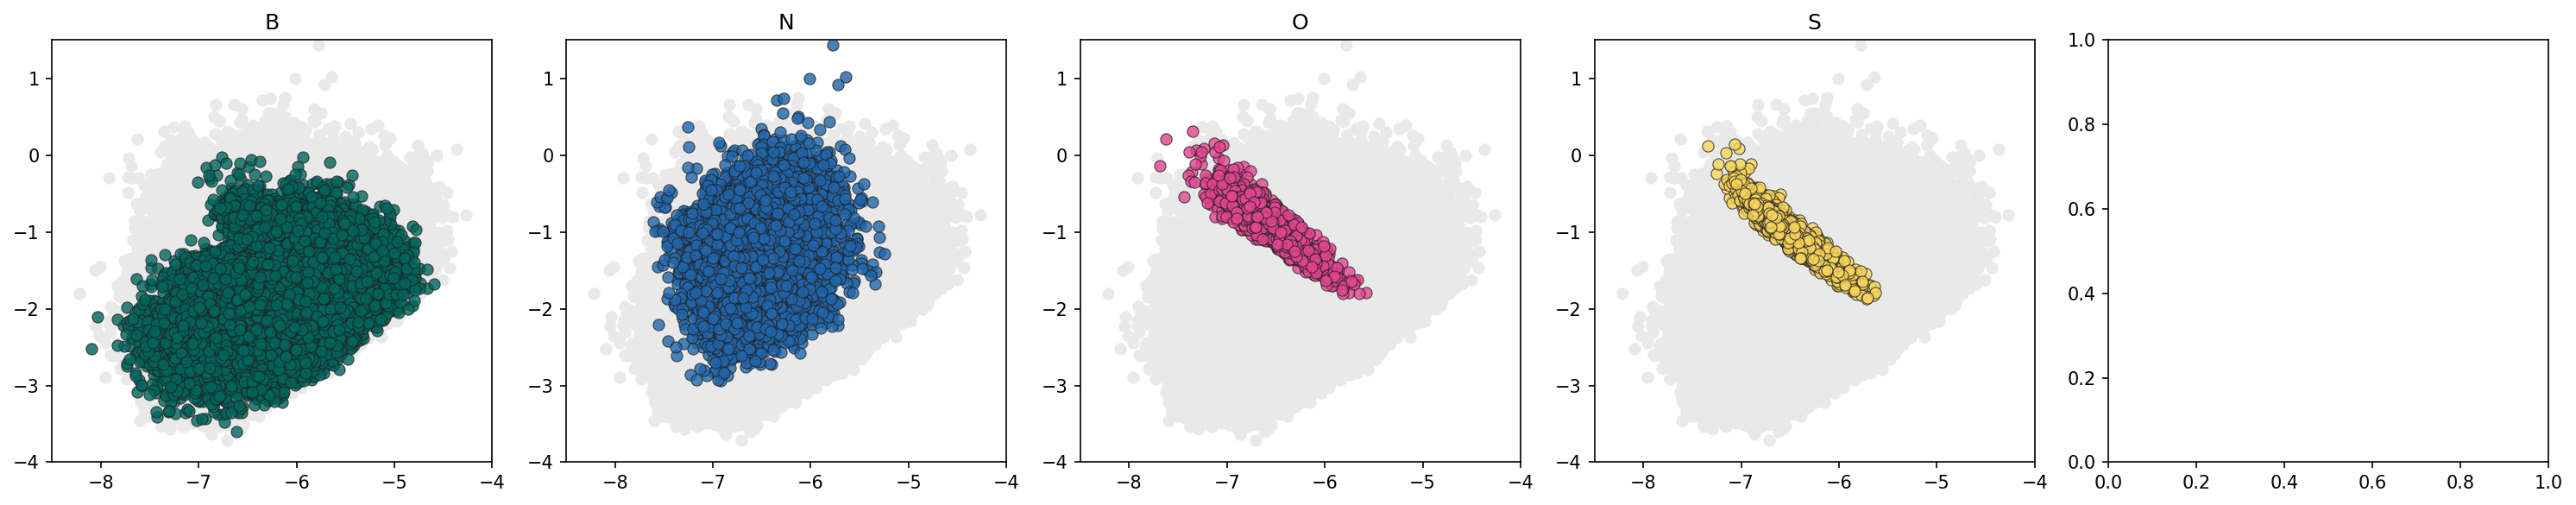

In [4]:
# make a grid plot for each properties n_cols = 6, infer n_rows
n_cols = 5
n_rows = int(np.ceil(len(atoms_colors) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows), dpi=150,)
axes = axes.flatten()

for i, (atom, color) in enumerate(atoms_colors.items()):
    print(get_query_atoms(atom))
    sns.scatterplot(data=df,
                    x='homo_corr',y='lumo_corr',
                    s=40,
                    color="#E9E9E9",
                    edgecolor=None,
                    ax=axes[i])
    sns.scatterplot(data=df.query(get_query_atoms(atom)),
                    x='homo_corr',y='lumo_corr',s=40,color=color,
                    edgecolor='#212121',
                    alpha=0.8,
                    ax=axes[i] )
    # remove axis 
    axes[i].set_xlim([-8.5, -4])
    axes[i].set_ylim([-4, 1.5])
    # show only three tickts
    # axes[i].set_xticks([-8, -6, -4]) 
    # axes[i].set_yticks([-4, -2, 0])
    #set title 
    axes[i].set_title(atom.upper())
    # show interger ticks
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))    
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))    
    # # set axis off
    # axes[i].set_axis_off()
    # hide labels
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.tight_layout()

## Individual scatterplots
The `background` scatter plot illustrates the distribution of all the molecular data points in HOMO-LUMO space. 
`Individual scatter plots` for distinct mono heterocyclic hPAHS highlight the effect of the different building blocks in the HOMO-LUMO energies of the molecules.

In [5]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
sns.scatterplot(data=df.sample(50000, random_state=1234),
                x='homo_corr',y='lumo_corr',
                s=40,
                color="#E9E9E9",
                edgecolor=None,
                ax=ax)
# set axis limits
ax.set_xlim([-8.5, -4])
ax.set_ylim([-4, 1.5])
# set intergeer tick locator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))    
ax.yaxis.set_major_locator(MaxNLocator(integer=True)) 
# hide labels
ax.set_xlabel('')
ax.set_ylabel('')
# save figure
plt.savefig('.temp/figures/chemical-space/homo-lumo-space-background.png')
# hide fgure
plt.close()

# make a grid plot for each properties n_cols = 6, infer n_rows
for i, (ring, color) in enumerate(heterocycles_colors.items()):
    fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
    sns.scatterplot(data=df.sample(50000, random_state=1234),
                x='homo_corr',y='lumo_corr',
                s=40,
                color="#E9E9E9",
                edgecolor=None,
                ax=ax)
    sns.scatterplot(data=df.query(get_query_bblocks(ring)),
                    x='homo_corr',y='lumo_corr',s=40,color=color,
                    edgecolor='#212121',
                    alpha=0.8,
                    ax=ax)

    #set title 
    # ax.set_title(ring.upper())
    # # set axis off
    # ax.set_axis_off()
    # hide labels
    ax.set_xlim([-8.5, -4])
    ax.set_ylim([-4, 1.5])
    # set intergeer tick locator
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))    
    ax.yaxis.set_major_locator(MaxNLocator(integer=True)) 
    # hide labels   
    ax.set_xlabel('')
    ax.set_ylabel('')
    # transparent background
    ax.set_facecolor('none')
    # hide spine
    plt.savefig(f'.temp/figures/chemical-space/homo-lumo-space-{ring}.png', transparent=True)
    plt.savefig(f'.temp/figures/chemical-space/homo-lumo-space-{ring}.svg',)
    # hide fgure
    plt.close()

In [10]:

atoms_colors = {
    # 'h':'#E1E1E1',            # aromatic
    'c':'#9E9E9E',     # antiaromatic
    'b':'#00665D',             # antiaromatic
    'n':'#2066AC',            # aromatic
    'o':'#E44591',              # aromatic
    's':'#F9D55C',          # aromatic

}

In [11]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
sns.scatterplot(data=df.sample(50000, random_state=1234),
                x='homo_corr',y='lumo_corr',
                s=40,
                color="#E9E9E9",
                edgecolor=None,
                ax=ax)
# set axis limits
ax.set_xlim([-8.5, -4])
ax.set_ylim([-4, 1.5])
# set intergeer tick locator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))    
ax.yaxis.set_major_locator(MaxNLocator(integer=True)) 
# hide labels
ax.set_xlabel('')
ax.set_ylabel('')
# save figure
plt.savefig('.temp/figures/chemical-space/homo-lumo-space-background.png')
# hide fgure
plt.close()

# make a grid plot for each properties n_cols = 6, infer n_rows
for i, (atom, color) in enumerate(atoms_colors.items()):
    fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
    sns.scatterplot(data=df.sample(50000, random_state=1234),
                x='homo_corr',y='lumo_corr',
                s=40,
                color="#E9E9E9",
                edgecolor=None,
                ax=ax)
    sns.scatterplot(data=df.query(get_query_atoms(atom)),
                    x='homo_corr',y='lumo_corr',s=40,color=color,
                    edgecolor='#212121',
                    alpha=0.8,
                    ax=ax)

    #set title 
    # ax.set_title(ring.upper())
    # # set axis off
    # ax.set_axis_off()
    # hide labels
    ax.set_xlim([-8.5, -4])
    ax.set_ylim([-4, 1.5])
    # set intergeer tick locator
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))    
    ax.yaxis.set_major_locator(MaxNLocator(integer=True)) 
    # hide labels   
    ax.set_xlabel('')
    ax.set_ylabel('')
    # transparent background
    ax.set_facecolor('none')
    # hide spine
    plt.savefig(f'.temp/figures/chemical-space/homo-lumo-space-{atom}.png', transparent=True)
    plt.savefig(f'.temp/figures/chemical-space/homo-lumo-space-{atom}.svg',)
    # hide fgure
    plt.close()

### HOMO-LUMO space dynamic visualization

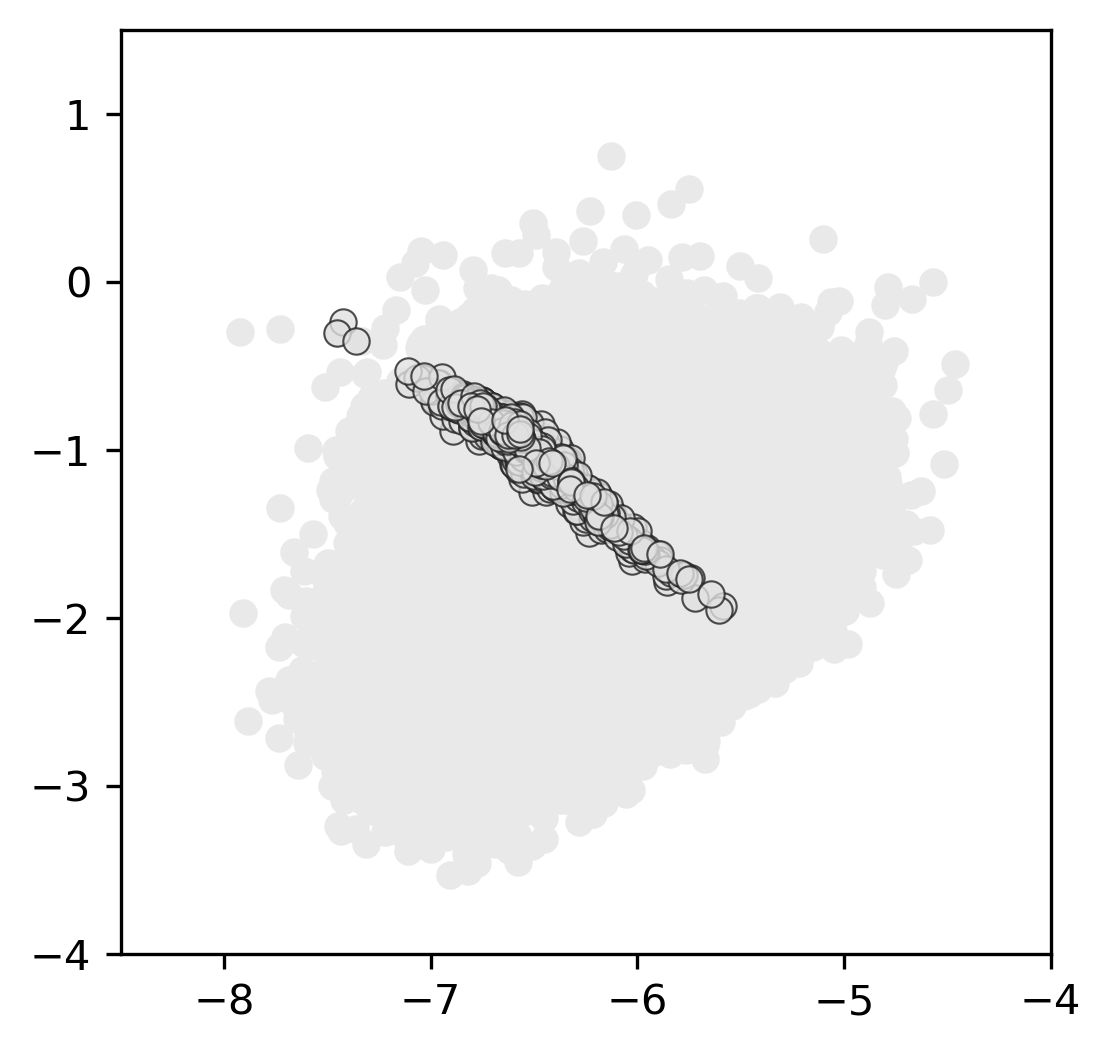

In [7]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# show matplotlib not inline
# %matplotlib qtagg

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)

# Function to update the plot for each frame
def update(frame):
    ax.clear()
    
    # Background scatter plot
    sns.scatterplot(data=df.sample(50000, random_state=42),
                    x='homo_corr', y='lumo_corr',
                    s=40,
                    color="#E9E9E9",
                    edgecolor=None,
                    ax=ax)
    
    # Overlay specific heterocycle scatter plot
    ring, color = list(heterocycles_colors.items())[frame]
    sns.scatterplot(data=df.query(get_query_bblocks(ring)),
                    x='homo_corr', y='lumo_corr', s=40, color=color,
                    edgecolor='#212121',
                    alpha=0.8,
                    ax=ax)

    # Set plot properties
    ax.set_xlim([-8.5, -4])
    ax.set_ylim([-4, 1.5])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel('')
    ax.set_ylabel('')

    plt.savefig(f'.temp/figures/chemical-space/frame_{frame:03d}.png')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(heterocycles_colors), interval=1000, repeat=False)

# Save the animation
ani.save('.temp/figures/chemical-space/homo-lumo-space-animation.gif', writer='pillow')

# Electronic property diversity across different heterocycles counts

Visualization of the change in the electronic structure of the COMPAS-2 molecules with respect to the count of each heterocycle. Each subplot corresponds to a specific heterocycle type, showcasing the distribution of the molecules in the HOMO and LUMO space. The gray points represent all the molecules in COMPAS-2 population, while colored points highlight molecules with varying ring counts for a specific heterocycle. 

C:\Users\eduardo.mayo\AppData\Local\Temp\ipykernel_36688\650866531.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\eduardo.mayo\AppData\Local\miniconda3\envs\chem_lab\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\eduardo.mayo\AppData\Local\miniconda3\envs\chem_lab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


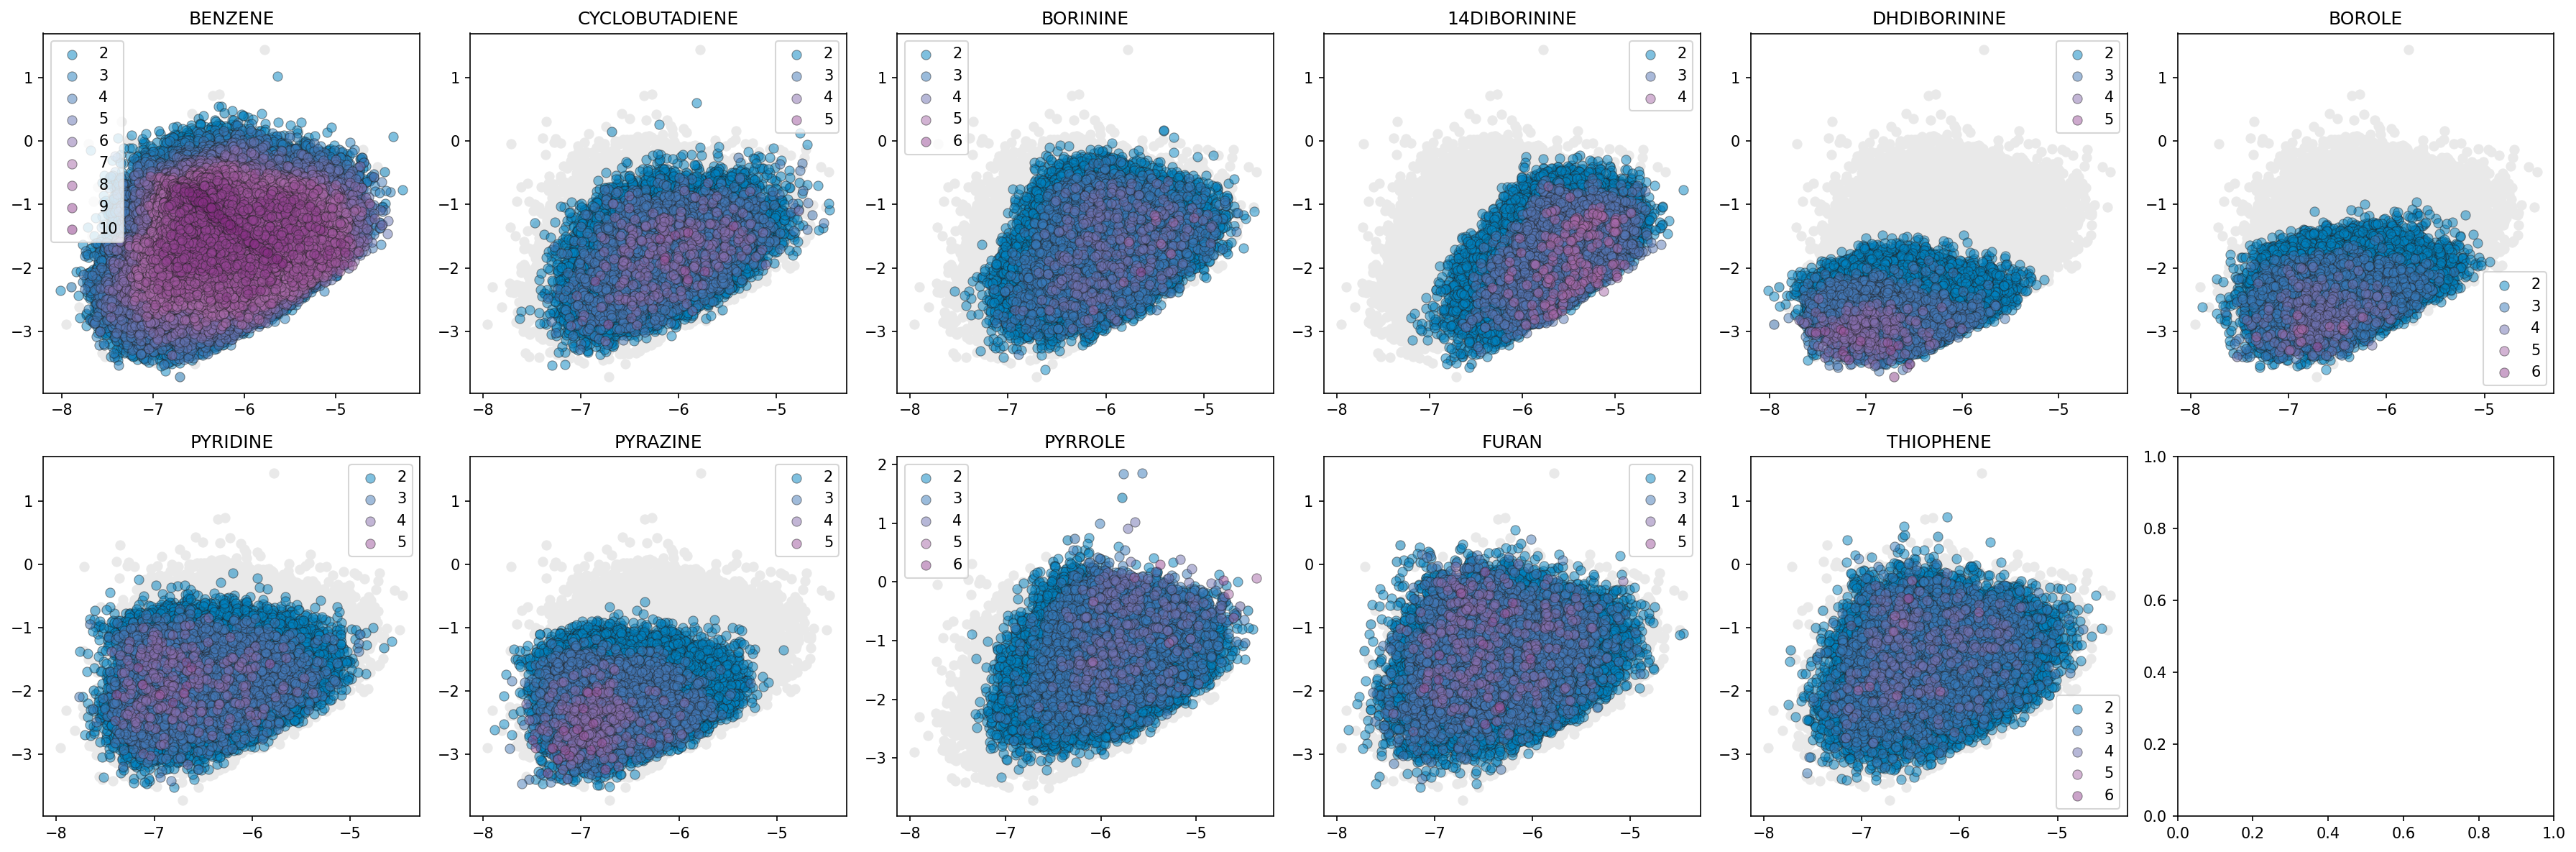

In [8]:
df[['cyclobutadiene', 'pyrrole', 'borole', 'furan', 'thiophene',
       'dhdiborinine', '14diborinine', 'pyrazine', 'pyridine', 'borinine',
       'benzene', 'h', 'c', 'b', 's', 'o', 'n']] = df[['cyclobutadiene', 'pyrrole', 'borole', 'furan', 'thiophene',
       'dhdiborinine', '14diborinine', 'pyrazine', 'pyridine', 'borinine',
       'benzene', 'h', 'c', 'b', 's', 'o', 'n']].astype(int)


# make a grid plot for each properties n_cols = 6, infer n_rows
n_cols = 6
n_rows = int(np.ceil(len(heterocycles_colors) / n_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows), dpi=150,)
axes = axes.flatten()

for i, (ring, _) in enumerate(heterocycles_colors.items()):
   sns.scatterplot(data=df.sample(50000, random_state=1234),
               x='homo_corr',y='lumo_corr',
               s=40,
               color="#E9E9E9",
               edgecolor=None,
               ax=axes[i])
   # get the range of the rings count
   uniques = df[ring].unique()
   uniques.sort()
   # set the minimum number of ring to 2
   uniques = uniques[2:]
   # get the min and max to center the cmap
   cmap_min = uniques[0]
   cmap_max = uniques[-1]
   # Scatter plot of the molecules with a given
   # number of rings. Iterate over all of them and 
   # overlay them from fewer to a larger number of rings.
   for h_count in uniques:
      sns.scatterplot(data=df.query(f'`{ring}` == {h_count}'),
                     x='homo_corr',y='lumo_corr',
                     s=40,
                     color=cmap((h_count-cmap_min)/cmap_max)[:3],
                     edgecolor='#212121',
                     alpha=0.5,
                     ax=axes[i],
                     label=str(h_count))
   axes[i].set_title(ring.upper())
   # show interger ticks
   axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))    
   axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))    
   # # set axis off
   # axes[i].set_axis_off()
   # hide labels
   axes[i].set_xlabel('')
   axes[i].set_ylabel('')
plt.tight_layout()